# Домашнє завдання: Статистичні візуалізації з Seaborn

## Опис завдання
У цьому домашньому завданні ви будете використовувати бібліотеку Seaborn для створення красивих статистичних візуалізацій. Seaborn має кращий стандартний стиль та спеціалізується на статистичних графіках.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - як відчувається температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Завантаження даних
df = pd.read_csv('/content/yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Встановлюємо стиль seaborn
sns.set_theme(style="whitegrid")

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour


---

## Завдання 1: Лінійний графік з довірчими інтервалами

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно з довірчими інтервалами (confidence intervals) рівними 1 стандартному відхиленню.

**УВАГА!** В лекції ми будували подібний графік, але там були дані по номеру місяця, а тут треба зобразити дані в розрізі місяць_рік.

В якості підказки вам наведений код для створення колонки, яка містить `місяць_рік`. Як її використати - вже питання до вас :)

Очікуваний результат:
![](https://drive.google.com/uc?id=1uVKqfY1VlhVMaM3wu99uVGT1f7S0Vf8S)

**Питання для інтерпретації:**
- В які місяці найбільша невизначеність в даних?

In [3]:
df['month_year'] = df.index.to_period('M')
df['month_year']  = df.month_year.astype(str)

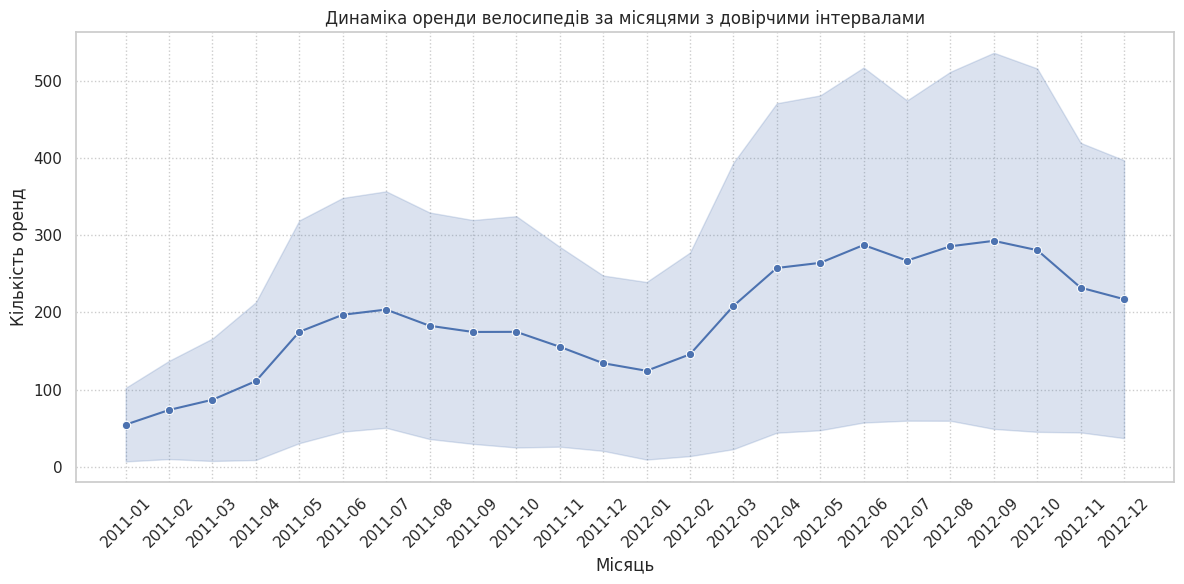

In [4]:
plt.figure(figsize=(12, 6))
sns.lineplot(df, x='month_year', y='count', marker='o', errorbar='sd')
plt.title('Динаміка оренди велосипедів за місяцями з довірчими інтервалами')
plt.xlabel('Місяць')
plt.ylabel('Кількість оренд')
plt.xticks(rotation=45)
plt.grid(linestyle=':')
plt.tight_layout()
plt.show()

Найбільша невизначеність даних, на мою думку, у період з квітня по жовтень 2012 року, адже в цей період спостерігаються найбільші значення стандартного відхилення (принаймні візуально).

## Завдання 2: Порівняння стилів - Pandas vs Seaborn гістограма

**Завдання:**
Побудуйте гістограму розподілу температури двома способами - з Pandas та Seaborn - та порівняйте візуальний вигляд. Задайте однакову кількість бінів в цих візуалізаціях, відмінну від стандартної. В візуалізації Seaborn додайте параметр при побудові `kde=True`.

**Функція Seaborn: `sns.histplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

**Дайте відповідь на питання:**
1. Яка візуальна різниця між Pandas та Seaborn гістограмами?
2. Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?

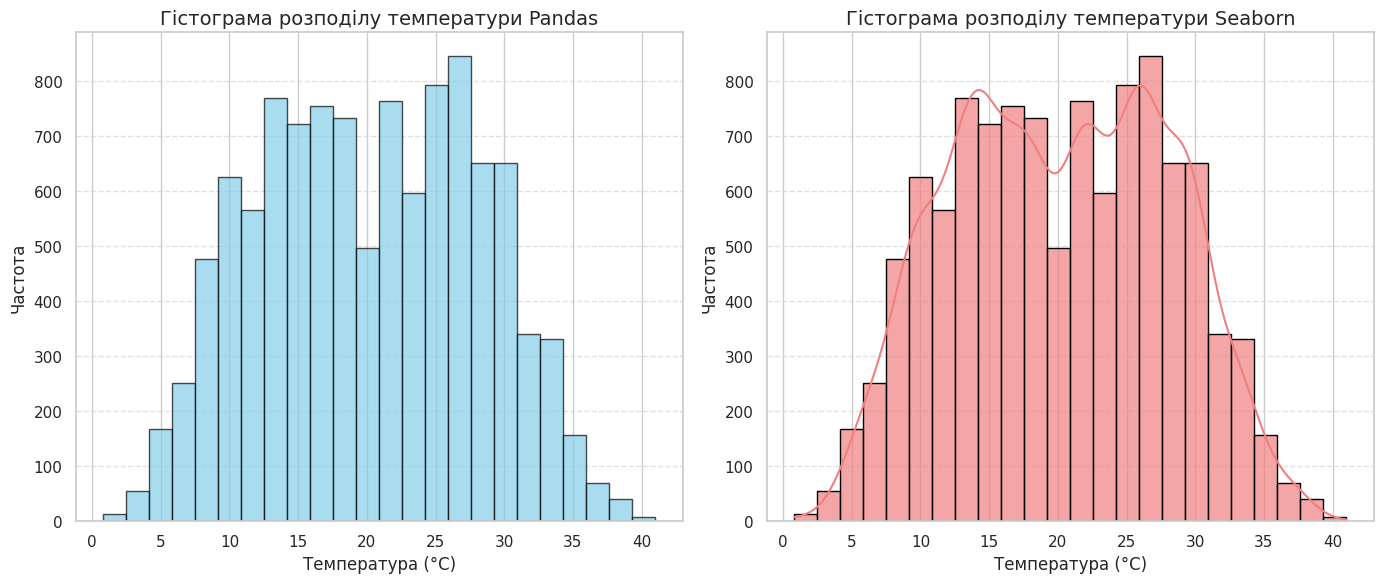

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

df['temp'].plot.hist(
    ax=axes[0],
    bins=24,
    edgecolor='black',
    alpha=0.7,
    color='skyblue'
)
axes[0].set_title('Гістограма розподілу температури Pandas', fontsize=14)
axes[0].set_xlabel('Температура (°C)')
axes[0].set_ylabel('Частота')
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

sns.histplot(
    x=df['temp'],
    ax=axes[1],
    bins=24,
    kde=True,
    edgecolor='black',
    alpha=0.7,
    color='lightcoral'
)
axes[1].set_title(f'Гістограма розподілу температури Seaborn', fontsize=14)
axes[1].set_xlabel('Температура (°C)')
axes[1].set_ylabel('Частота')
axes[1].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

1. Окрім лінії, яку ми викликали за допомогою kde=True, я не бачу принципової різниці.
2. Додаткова лінія згладжує ступінчатість бінів гістограми і допомагає краще зрозуміти форму розподілу даних.  

## Завдання 3: Box Plot порівняння - Pandas vs Seaborn

**Завдання:**
Побудуйте box plot для кількості погодинних оренд велосипедів за погодними умовами з Pandas та Seaborn.

**Функція Seaborn: `sns.boxplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

Просунуте доповнення:
- підпишіть погодні умови їх інтерпретацією з опису даних в обох графіках

**Дайте відповідь на питання:**
- Яка візуальна різниця між Pandas та Seaborn бокс-плотами?

In [6]:
weather_legend_labels = {
    1: 'Ясно',
    2: 'Туман',
    3: 'Легкий дощ',
    4: 'Сильний дощ'
}
custom_legend_labels = [weather_legend_labels[code] for code in df['weather']]

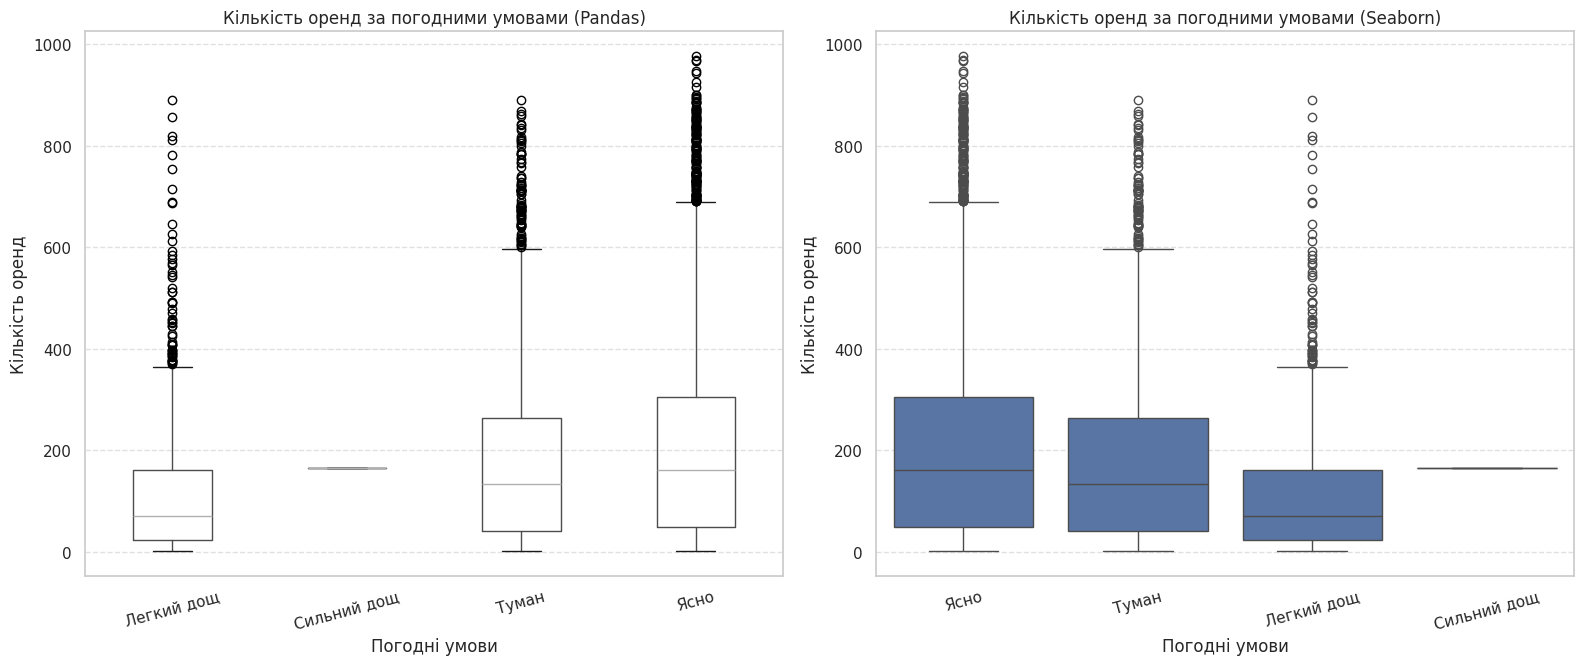

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

df.boxplot(column='count', by=custom_legend_labels, ax=axes[0], grid=False)

fig.suptitle('')
axes[0].set_title('Кількість оренд за погодними умовами (Pandas)')
axes[0].set_xlabel('Погодні умови')
axes[0].set_ylabel('Кількість оренд')
axes[0].tick_params(axis='x', rotation=15)
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

sns.boxplot(data=df, x=custom_legend_labels, y='count', ax=axes[1])

axes[1].set_title('Кількість оренд за погодними умовами (Seaborn)')
axes[1].set_xlabel('Погодні умови')
axes[1].set_ylabel('Кількість оренд')
axes[1].tick_params(axis='x', rotation=15)
axes[1].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

Box plot у Seaborn виглядає більш м'яко, самі бокси ширші і пофарбовані у синій колір. І при маппінгу назв погодних умов по дефолту зберігся порядок боксів, у Pandas бокси стали в алфавітному порядку, а у Seaborn залишились у порядку числових індексів.

<!-- - -->
## Завдання 4: Heatmap кореляційної матриці

**Завдання:**
Створіть із Seaborn кореляційну матрицю з забарвленням heatmap (колір відповідає величині значення в клітинці) числових змінних в наших даних з анотаціями значень.

**Дайте відповіді на питання по графіку:**
1. Які змінні найсильніше корелюють з загальною кількістю оренди (count)?
2. Яка кореляція між temp та atemp? Чому?
3. Які змінні мають негативну кореляцію?


In [9]:
correl = df[['weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr()
correl

,weather,temp,atemp,humidity,windspeed,casual,registered,count
weather,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,-0.128655,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


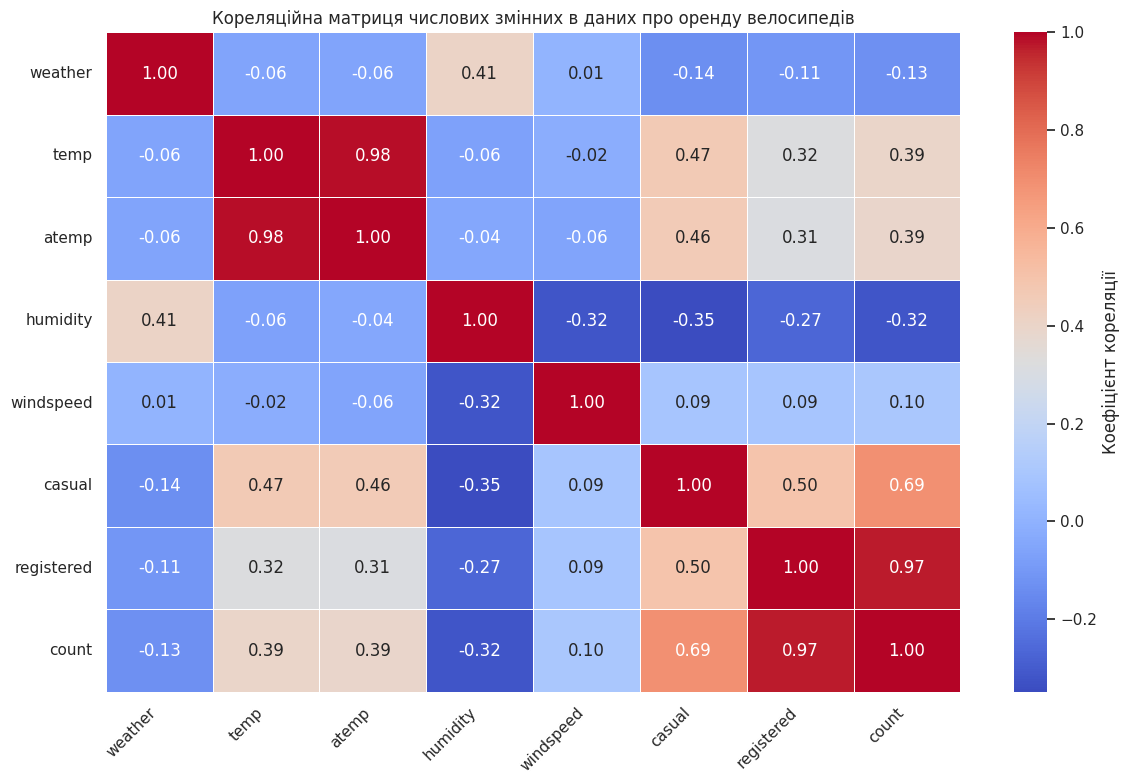

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    correl,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    cbar_kws={'label': 'Коефіцієнт кореляції'}
)
plt.title('Кореляційна матриця числових змінних в даних про оренду велосипедів')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

1. Найсильніше з count корелюють колонки casual і registered.
2. Кореляція між temp та atemp дуже близька до 1. Це дуже пов'язані між собою показники. Здається навіть atemp обчислюється на основі temp тому не дивно що вони сильно пов'язані між собою.
3. Негативну кореляцію мають переважно weather, humidity та windspeed.

## Завдання 5: Violin Plot для глибокого аналізу розподілів

**Завдання:**
Створіть violin plot для аналізу розподілу оренди за сезонами.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показує "товщина" violin plot?
2. В якому сезоні найбільша варіабельність оренди?
3. Яка перевага violin plot над звичайним box plot?


In [30]:
# Створимо нову колонку з більш правильними на мою думку сезонами
df ['Season_R'] = df ['month'].apply(lambda m:
                        'Зима'if m in [12, 1, 2] else
                        'Весна' if m in [3, 4, 5] else
                        'Літо' if m in [6, 7, 8] else
                        'Осінь'
)

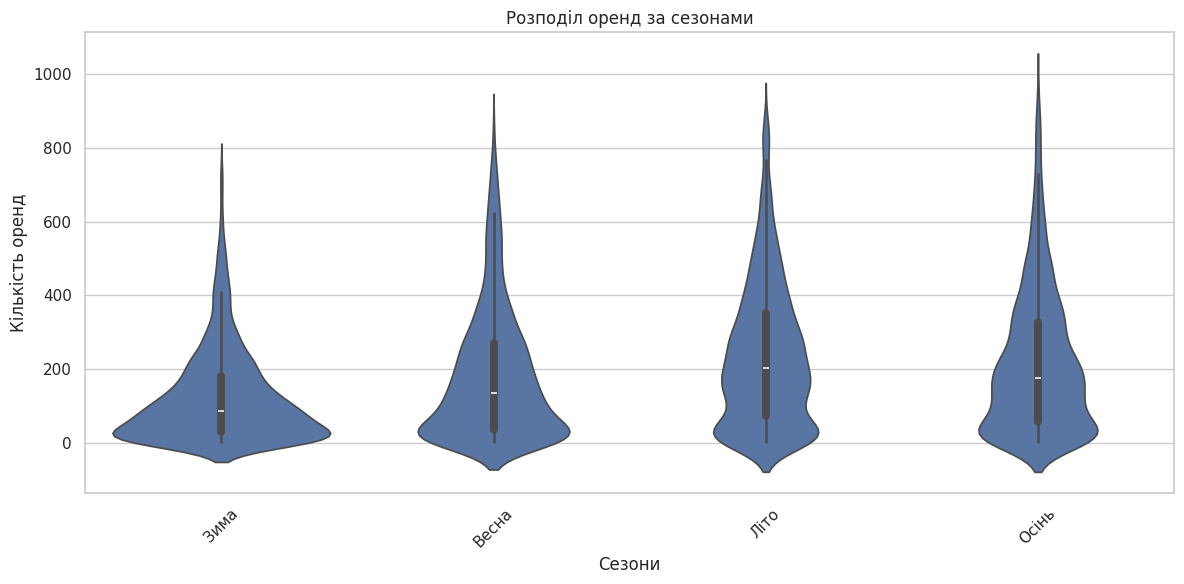

In [14]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Season_R', y='count')
plt.xticks(rotation=45)
plt.title('Розподіл оренд за сезонами')
plt.xlabel('Сезони')
plt.ylabel('Кількість оренд')
plt.tight_layout()
plt.show()

1. Товщина violin plot показує частоту данних у цій точці.
2. Найбільша варіабелність оренди відповідно до графіку восени.
3.  Violin Plot на відміну від Box Plot показує повну форму розподілу, а не лише підсумкові статистики.

## Завдання 6: Pairplot для мультиваріативного аналізу

**Завдання:**
Створіть pairplot для аналізу взаємозв'язків між ключовими змінними `'temp', 'humidity', 'windspeed', 'count'` . В якості візуальної розбивки за категоріями (параметр `hue`) додайте сезон.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Між якими змінними спостерігається найсильніший лінійний зв'язок?
2. Яка характеристика найбільше змінюється від сезону?

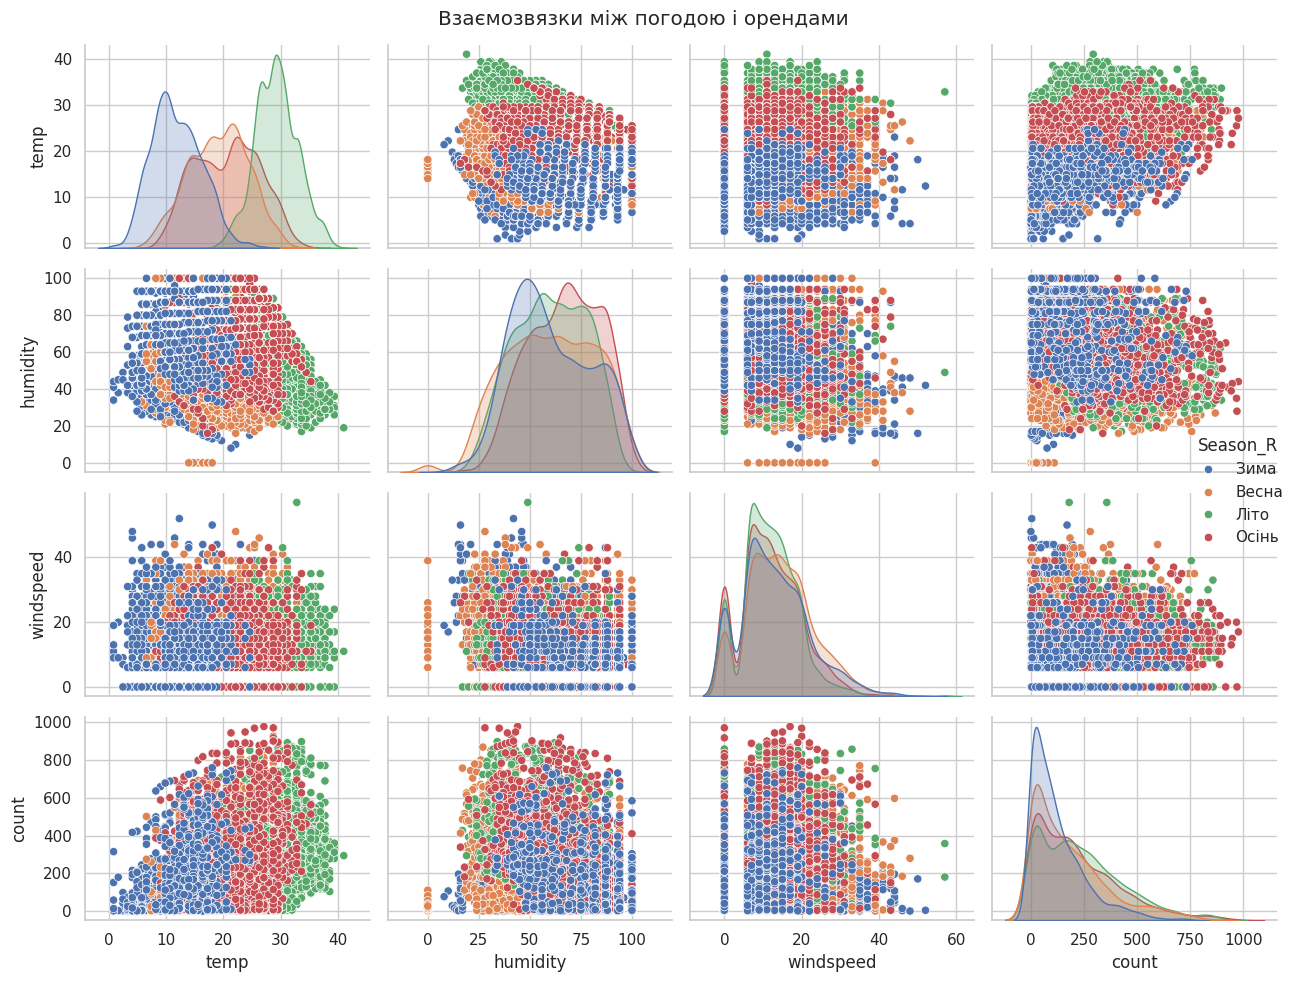

In [29]:
sns.pairplot(df[['temp', 'humidity', 'windspeed', 'count', 'Season_R']], hue="Season_R", height=2.5, aspect=1.2)
plt.suptitle('Взаємозвязки між погодою і орендами')
plt.tight_layout()
plt.show()

1. Найсильніший зв'язок, мені здається між температурою і кількістю оренд.
2. Від сезону найбільше змінюється температура.

## Завдання 7: Joint Plot для детального аналізу двох змінних

**Завдання:**
Проаналізуйте залежність між температурою та орендою за допомогою joint plot. В якості візуальної розбивки за категоріями (параметр `hue`) додайте `workingday`.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показують графіки по краях?
2. Чи є різниця у поведінці користувачів у робочий і неробочий день?

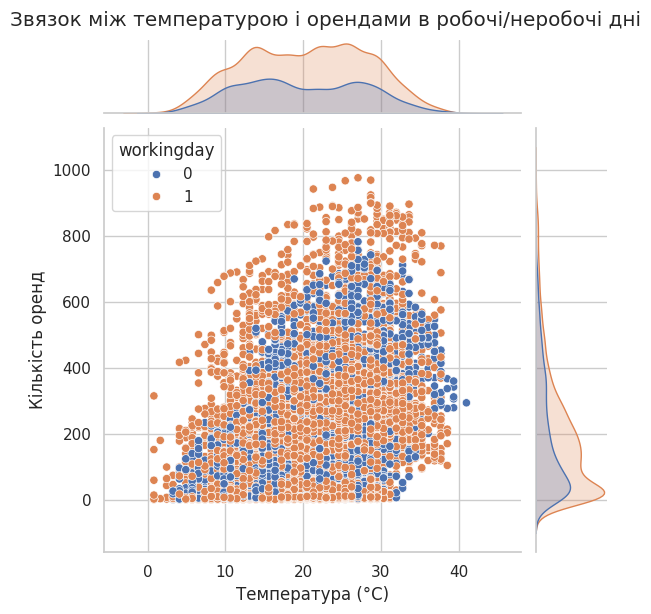

In [33]:
sns.jointplot(data=df, x='temp', y='count', hue='workingday')
plt.suptitle('Звязок між температурою і орендами в робочі/неробочі дні', y=1.02)
plt.xlabel('Температура (°C)')
plt.ylabel('Кількість оренд')
plt.show()

1. Графіки по краях показують те ж що і товщина violin plot, а саме кількість даних у цій точці.
2. У робочі дні користувачі більше і частіше користуються сервісом, хоча можливо так здається через те що робочих днів значно більше ніж неробочих.